# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [13]:
#importanto bibiotecas e carregando arquivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df_prev_renda = pd.read_csv('previsao_de_renda.csv')
df_prev_renda = df_prev_renda.dropna()


#print(df_prev_renda.columns)
df_prev_renda.drop(columns=['Unnamed: 0', 'index',
                               'qtd_filhos','idade','tempo_emprego', 
                               'qt_pessoas_residencia', 'tipo_residencia',
                               ],inplace=True)

df_prev_renda_aux = df_prev_renda[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
       'educacao', 'estado_civil', 'mau', 'renda']]
df_prev_renda_aux.columns


Index(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
       'educacao', 'estado_civil', 'mau', 'renda'],
      dtype='object')

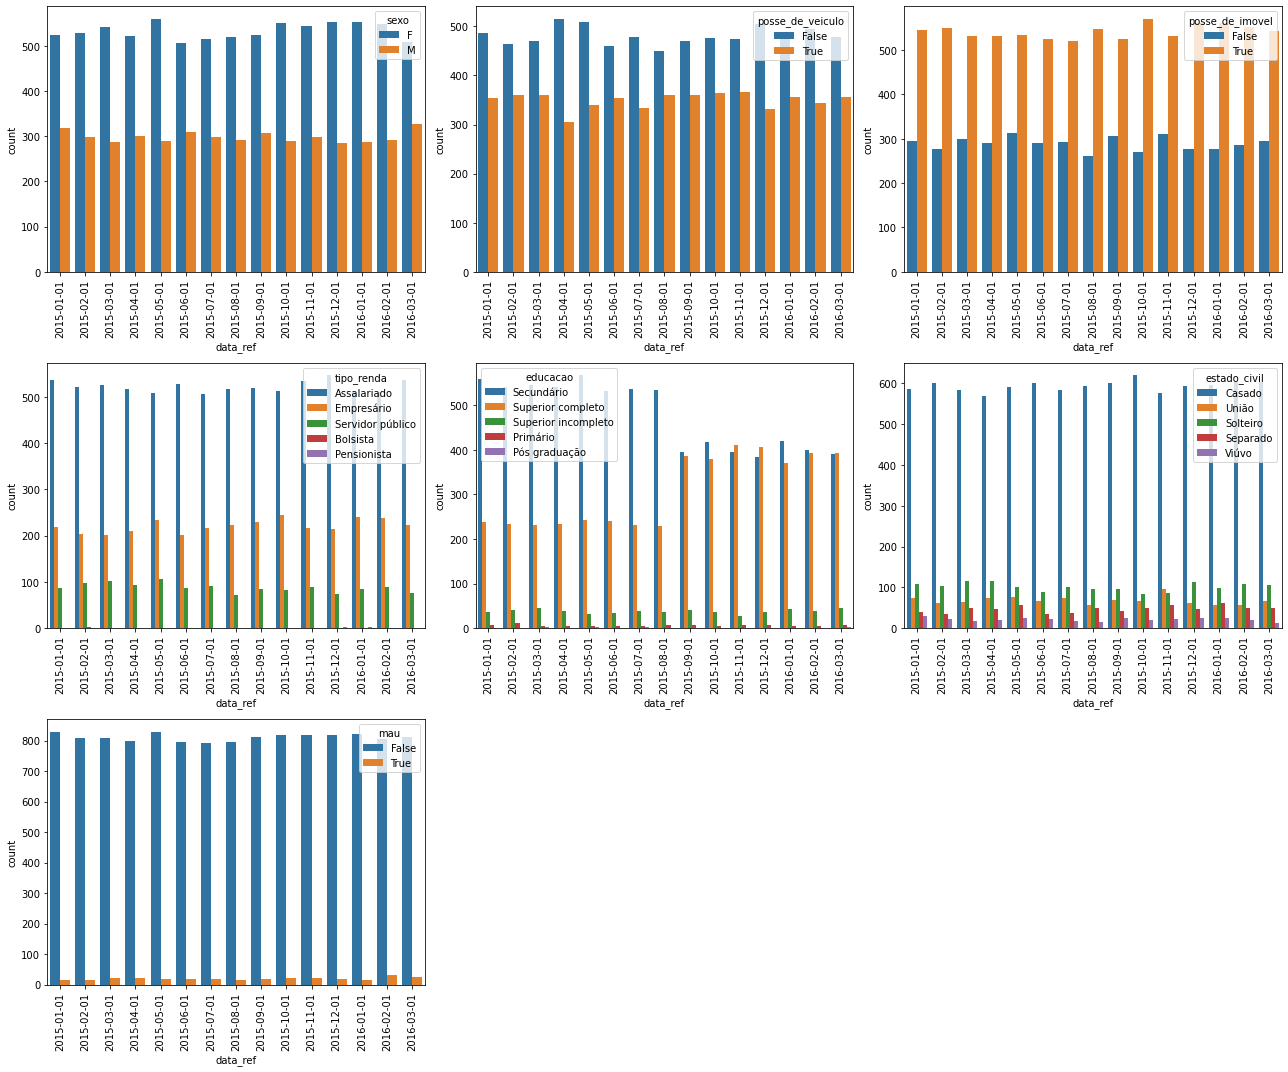

In [14]:
plt.rc('figure', figsize=(18,15))
fig, axes = plt.subplots(3,3)


sns.countplot(ax = axes[0,0], x='data_ref', hue='sexo', data = df_prev_renda)
sns.countplot(ax = axes[0,1], x='data_ref',hue='posse_de_veiculo', data = df_prev_renda)
sns.countplot(ax = axes[0,2], x='data_ref',hue='posse_de_imovel', data = df_prev_renda)
sns.countplot(ax = axes[1,0], x='data_ref',hue='tipo_renda', data = df_prev_renda)
sns.countplot(ax = axes[1,1], x='data_ref',hue='educacao', data = df_prev_renda)
sns.countplot(ax = axes[1,2], x='data_ref',hue='estado_civil', data = df_prev_renda)
sns.countplot(ax = axes[2,0], x='data_ref',hue='mau', data = df_prev_renda)
#sns.barplot(ax = axes[2,1], x = 'data_ref', y='renda' , hue='educacao', ci=None, data = df_prev_renda)
#sns.barplot( x = 'data_ref', y='renda' , hue='educacao', ci=None, data = df_prev_renda)
#sns.countplot(ax = axes[0,2], x='SEXO', data = nasc_vivos)
#sns.barplot(ax = axes[1,0], x = 'GESTACAO', y = 'SEMANAS' , data = gestacao_ord)
#sns.barplot(ax = axes[1,2], x = 'QTDE', y= 'Est_Civil' , data = estcivmae_ord)
axes[0,0].tick_params(axis='x',rotation=90)
axes[0,1].tick_params(axis='x',rotation=90)
axes[0,2].tick_params(axis='x',rotation=90)
axes[1,0].tick_params(axis='x',rotation=90)
axes[1,1].tick_params(axis='x',rotation=90)
axes[1,2].tick_params(axis='x',rotation=90)
axes[1,2].tick_params(axis='x',rotation=90)
axes[2,0].tick_params(axis='x',rotation=90)
axes[2,1].tick_params(axis='x',rotation=90)
axes[2,1].set_visible(False)
axes[2,2].set_visible(False)

fig.tight_layout()
plt.show()


A maioria das variáveis qualitativas mantem-se em um padrão apesar de ter pequenas variações. A exceção é a variável de educação, onde temos um número muito maior de pessoas com  superior completo a partir de setembro de 2015, e existe uma redução do número de pessoas com segundo grau completo. Uma investigação maior nesta variável talvez vai trazer alguma resposta para nós.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

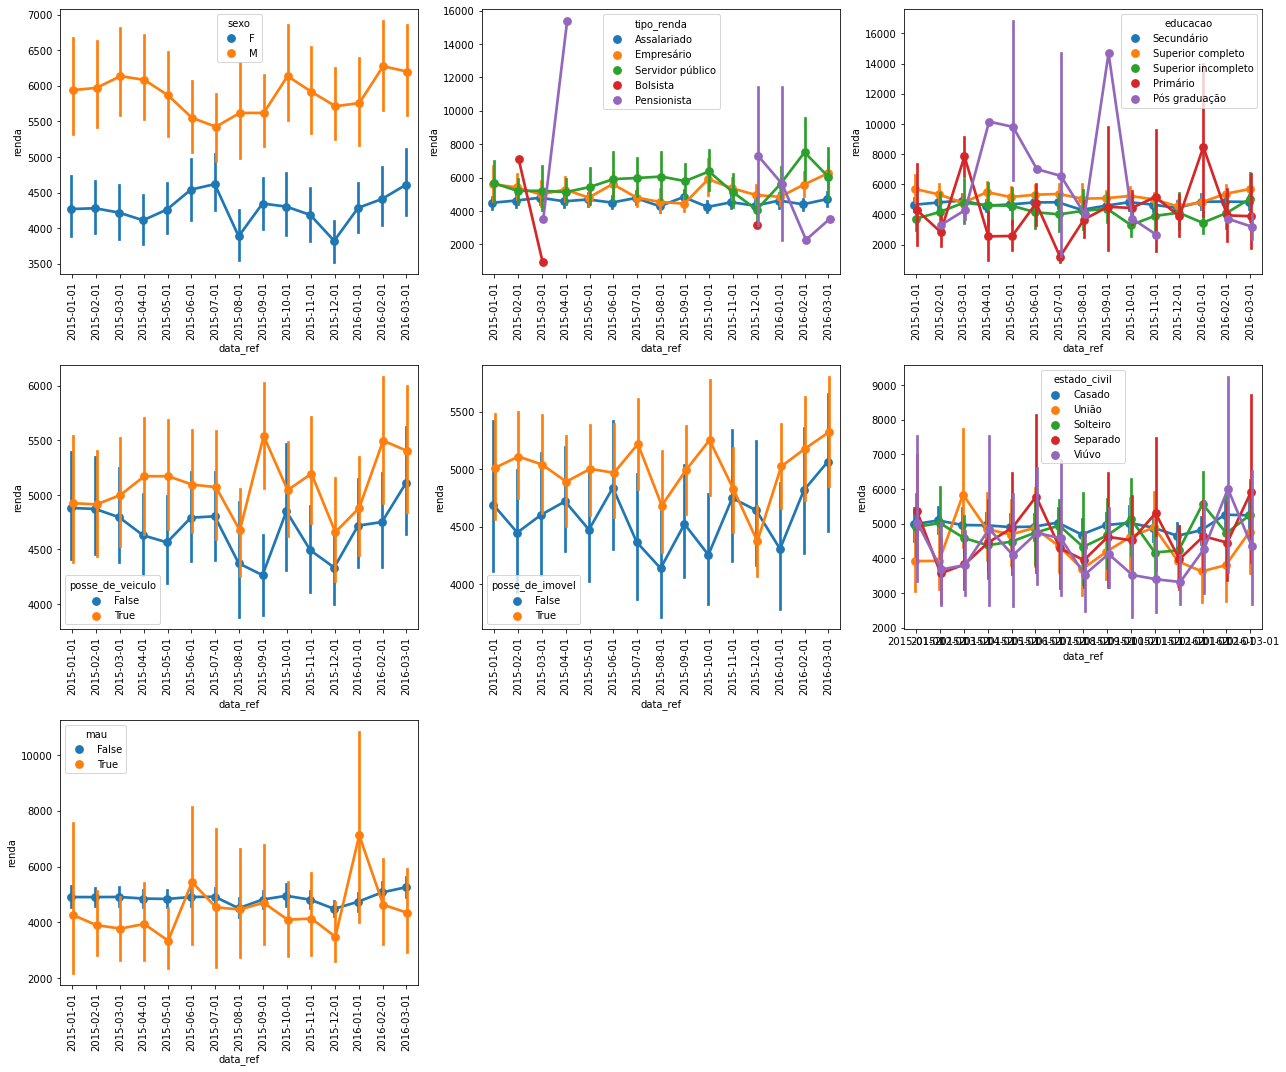

In [15]:
plt.rc('figure', figsize=(18,15))
fig, axes = plt.subplots(3,3)


sns.pointplot(ax = axes[0,0], x='data_ref',y='renda', hue='sexo', data = df_prev_renda_aux, dodge=True, ci=95)
sns.pointplot(ax = axes[0,1], x='data_ref',y='renda', hue='tipo_renda', data = df_prev_renda_aux, dodge=True, ci=95)
sns.pointplot(ax = axes[0,2], x='data_ref',y='renda', hue='educacao', data = df_prev_renda_aux, dodge=True, ci=95)
sns.pointplot(ax = axes[1,0], x='data_ref',y='renda', hue='posse_de_veiculo', data = df_prev_renda_aux, dodge=True, ci=95)
sns.pointplot(ax = axes[1,1], x='data_ref',y='renda', hue='posse_de_imovel', data = df_prev_renda_aux, dodge=True, ci=95)
sns.pointplot(ax = axes[1,2], x='data_ref',y='renda', hue='estado_civil', data = df_prev_renda_aux, dodge=True, ci=95)
sns.pointplot(ax = axes[2,0], x='data_ref',y='renda', hue='mau', data = df_prev_renda_aux, dodge=True, ci=95)


axes[0,0].tick_params(axis='x',rotation=90)
axes[0,1].tick_params(axis='x',rotation=90)
axes[0,2].tick_params(axis='x',rotation=90)
axes[1,0].tick_params(axis='x',rotation=90)
axes[1,1].tick_params(axis='x',rotation=90)
axes[1,1].tick_params(axis='x',rotation=90)
axes[2,0].tick_params(axis='x',rotation=90)
axes[2,1].set_visible(False)
axes[2,2].set_visible(False)

fig.tight_layout()
plt.show()


Percebemos pelos gráficos acima que 3 variáveis poderiam responder melhor o nível de renda das pessoas. São elas: sexo, posse_de_veiculo e posse_de_imóvel. Percebemos que às médias para cada categoria de dados das variáveis são discrepantes. Também percebemos que a investigação do item 1 não se fez verdadeira, o aumento do número de pessoas com superior completo, não alterou a média de renda das pessoas. 